In [1]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from keras.datasets import mnist
(X_train,y_train),(X_test,y_test)=mnist.load_data()
X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train/=255
X_test/=255
Y_train=np_utils.to_categorical(y_train,10)
Y_test=np_utils.to_categorical(y_test,10)
pattern=Sequential()
pattern.add(Conv2D(filters=50,kernel_size=(3,3),strides=(2,2),activation="relu",input_shape=(28,28,1)))
pattern.add(MaxPool2D(pool_size=(2,2),strides=(1,1)))
pattern.add(Dropout(0.2))
pattern.add(Conv2D(filters=50,kernel_size=(3,3),strides=(2,2),activation="relu"))
pattern.add(MaxPool2D(pool_size=(2,2),strides=(1,1)))
pattern.add(Dropout(0.2))
pattern.add(Flatten())
pattern.add(Dropout(0.2))
pattern.add(Dense(128,activation="relu"))
pattern.add(Dense(64,activation="relu"))
pattern.add(Dense(10,activation="softmax"))
pattern.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
pattern.fit(X_train,y_train,batch_size=32,epochs=10)

Using TensorFlow backend.
C:\Users\Tuhin Roy\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Tuhin Roy\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Tuhin Roy\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Tuhin Roy\anaconda3\lib\site-packages\tensorflow\python\fra



Epoch 1/10
60000/60000 [==============================] - 63s 1ms/step - loss: 0.2331 - accuracy: 0.9247 0s - loss: 0.2339 - accuracy
Epoch 2/10
60000/60000 [==============================] - 67s 1ms/step - loss: 0.0876 - accuracy: 0.9721
Epoch 3/10
60000/60000 [==============================] - 71s 1ms/step - loss: 0.0675 - accuracy: 0.9787
Epoch 4/10
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0579 - accuracy: 0.9815
Epoch 5/10
60000/60000 [==============================] - 47s 791us/step - loss: 0.0515 - accuracy: 0.9842
Epoch 6/10
60000/60000 [==============================] - 44s 739us/step - loss: 0.0456 - accuracy: 0.9857
Epoch 7/10
60000/60000 [==============================] - 42s 701us/step - loss: 0.0410 - accuracy: 0.9876
Epoch 8/10
60000/60000 [==============================] - 44s 736us/step - loss: 0.0390 - accuracy: 0.9876
Epoch 9/10
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0360 - accuracy: 0.9884
Epoch 10/10
6000

In [4]:
train_loss,train_accuracy=pattern.evaluate(X_train,y_train)
test_loss,test_accuracy=pattern.evaluate(X_test,y_test)
print("Train data accuracy score :",train_accuracy*100)
print("Test data accuracy score :",test_accuracy*100)

10000/10000 [==============================] - 2s 182us/step
Train data accuracy score : 99.6649980545044
Test data accuracy score : 98.94000291824341


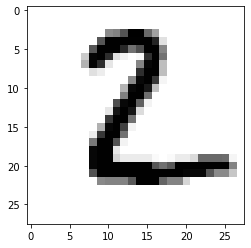

 Number pattern is : 2 , 100.0 %


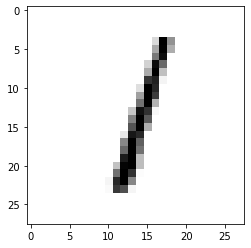

 Number pattern is : 1 , 99.95 %


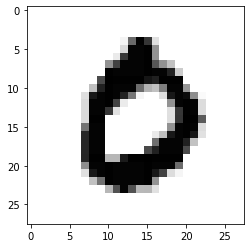

 Number pattern is : 0 , 100.0 %


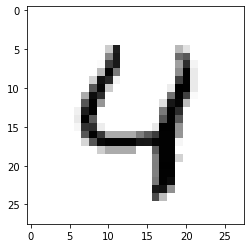

 Number pattern is : 4 , 99.8 %


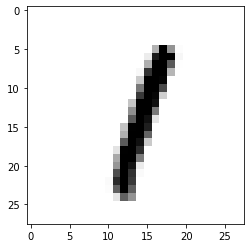

 Number pattern is : 1 , 99.99 %


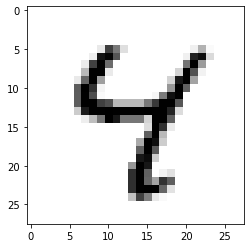

 Number pattern is : 4 , 99.34 %


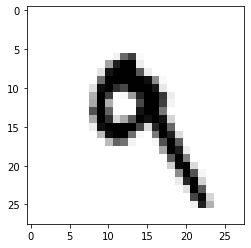

 Number pattern is : 9 , 100.0 %


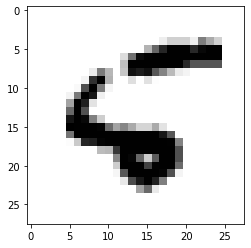

 Number pattern is : 5 , 99.26 %


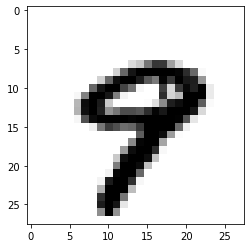

 Number pattern is : 9 , 100.0 %


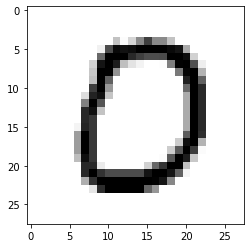

 Number pattern is : 0 , 100.0 %


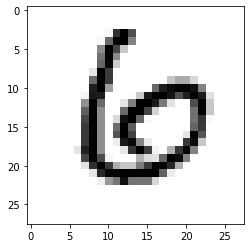

 Number pattern is : 6 , 100.0 %


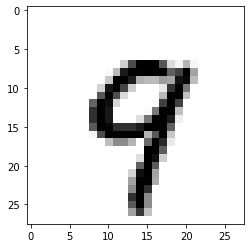

 Number pattern is : 9 , 99.99 %


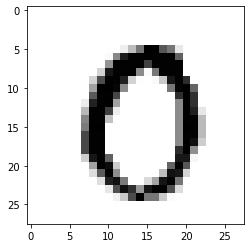

 Number pattern is : 0 , 100.0 %


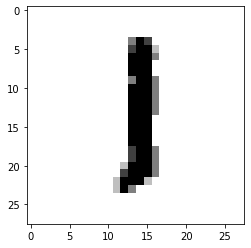

 Number pattern is : 1 , 100.0 %


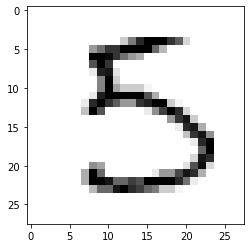

 Number pattern is : 5 , 100.0 %


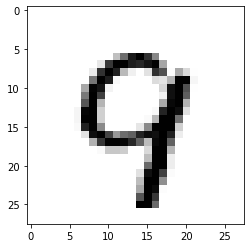

 Number pattern is : 9 , 100.0 %


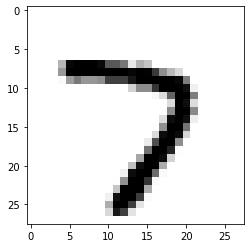

 Number pattern is : 7 , 99.97 %


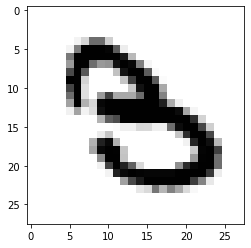

 Number pattern is : 3 , 99.24 %


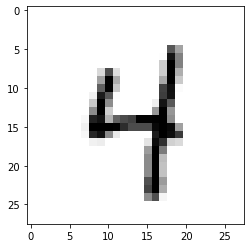

 Number pattern is : 4 , 100.0 %


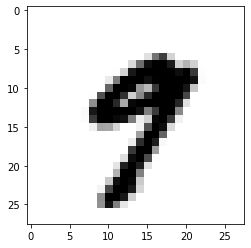

 Number pattern is : 9 , 99.96 %


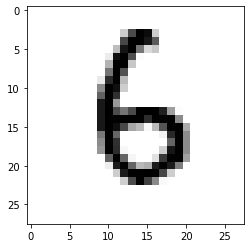

 Number pattern is : 6 , 99.99 %


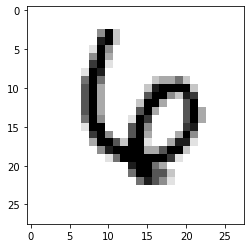

 Number pattern is : 6 , 100.0 %


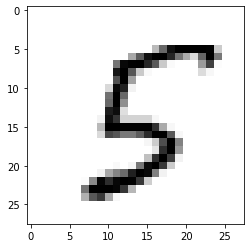

 Number pattern is : 5 , 100.0 %


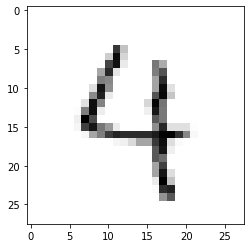

 Number pattern is : 4 , 98.77 %


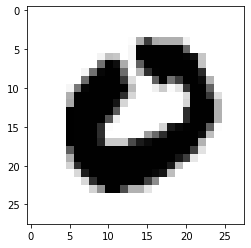

 Number pattern is : 0 , 100.0 %


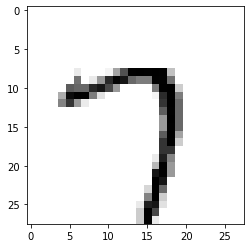

 Number pattern is : 7 , 99.92 %


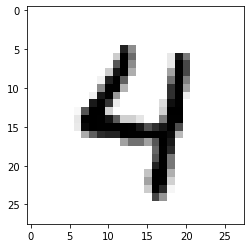

 Number pattern is : 4 , 100.0 %


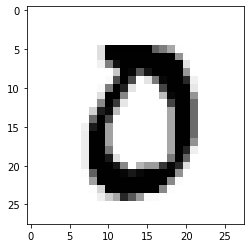

 Number pattern is : 0 , 100.0 %


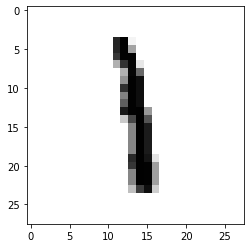

 Number pattern is : 1 , 99.95 %


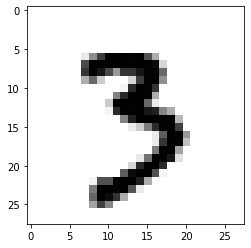

 Number pattern is : 3 , 100.0 %


In [9]:
import numpy as np
import matplotlib.pyplot as plt
prediction=pattern.predict(X_test)
for index in range (1,31):
    image=X_test[index].reshape((28,28))
    plt.imshow(image,cmap="binary")
    plt.show()
    print(" Number pattern is :",np.argmax(prediction[index]),',',(np.max(prediction[index])*100).round(2),"%")
    index+=1